In [1]:
import numpy as np
import numpy.linalg as la
import cv2 as cv
import matplotlib.pyplot as pl

(83, 49, 3)


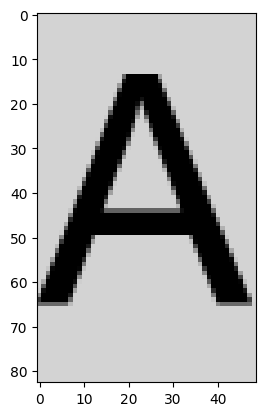

In [2]:
im0 = cv.imread ('label_A.png')
print (im0.shape)
pl.imshow (im0)

(83, 49)
0
211


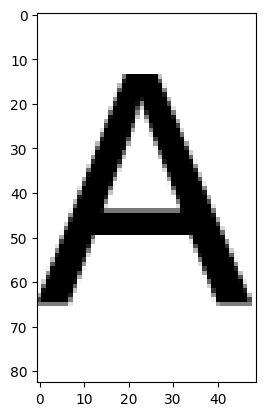

In [3]:
im = cv.cvtColor (im0, cv.COLOR_BGR2GRAY)
print (im.shape)
print (np.min (im))
print (np.max (im))
pl.imshow (im, cmap = 'gray')

(83, 49)
0.0
0.8274509803921568


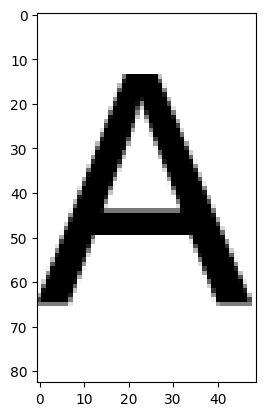

In [4]:
A = im / 255.0
print (A.shape)
print (np.min (A))
print (np.max (A))
pl.imshow (A, cmap = 'gray')

In [5]:
rkA = la.matrix_rank (A)
print (rkA)

49


In [6]:
U, D, VT = la.svd (A)
print (U.shape)
print (D.shape)
print (VT.shape)
print (D)

(83, 83)
(49,)
(49, 49)
[4.36018403e+01 1.14173011e+01 8.79031570e+00 6.65243901e+00
 5.07988897e+00 2.73785383e+00 2.23332771e+00 1.96891059e+00
 1.68521179e+00 1.67137732e+00 1.47343907e+00 1.11560040e+00
 1.08531800e+00 9.37676005e-01 8.78543930e-01 7.60220723e-01
 6.64485379e-01 6.49812662e-01 5.29618764e-01 5.14774401e-01
 4.24953902e-01 3.45932749e-01 3.19145906e-01 2.76448047e-01
 2.28677260e-01 2.03298346e-01 1.48096547e-01 1.40156115e-01
 1.30771138e-01 1.17445785e-01 9.43324739e-02 8.41251239e-02
 7.41423753e-02 5.25229535e-02 5.18780296e-02 4.41524289e-02
 3.97979753e-02 3.45728122e-02 2.84506573e-02 2.36750824e-02
 2.04109459e-02 1.55248441e-02 1.31764864e-02 7.00801729e-03
 6.13943578e-03 2.90108945e-03 2.30148586e-03 1.94121093e-03
 5.03945466e-04]


In [7]:
m = U.shape [0]
n = D.shape [0]
print (m, n)
Sigma = np.zeros ((m, n))
Sigma [0:n, 0:n] = np.diag (D)
print (Sigma.shape)

83 49
(83, 49)


In [8]:
print (U.shape)
print (Sigma.shape)
print (VT.shape)

(83, 83)
(83, 49)
(49, 49)


In [9]:
U @ Sigma @ VT - A

array([[3.88578059e-15, 7.54951657e-15, 7.21644966e-15, ...,
        7.21644966e-15, 5.88418203e-15, 6.10622664e-15],
       [3.33066907e-16, 1.66533454e-15, 2.55351296e-15, ...,
        1.88737914e-15, 1.33226763e-15, 7.77156117e-16],
       [1.22124533e-15, 2.77555756e-15, 3.66373598e-15, ...,
        2.99760217e-15, 1.11022302e-15, 1.66533454e-15],
       ...,
       [1.22124533e-15, 2.77555756e-15, 3.21964677e-15, ...,
        2.66453526e-15, 1.44328993e-15, 1.66533454e-15],
       [1.11022302e-15, 1.99840144e-15, 2.99760217e-15, ...,
        2.33146835e-15, 1.33226763e-15, 1.44328993e-15],
       [1.11022302e-15, 2.33146835e-15, 3.10862447e-15, ...,
        2.44249065e-15, 1.55431223e-15, 1.44328993e-15]])

In [10]:
a = U @ Sigma @ VT - A
print (a)

[[3.88578059e-15 7.54951657e-15 7.21644966e-15 ... 7.21644966e-15
  5.88418203e-15 6.10622664e-15]
 [3.33066907e-16 1.66533454e-15 2.55351296e-15 ... 1.88737914e-15
  1.33226763e-15 7.77156117e-16]
 [1.22124533e-15 2.77555756e-15 3.66373598e-15 ... 2.99760217e-15
  1.11022302e-15 1.66533454e-15]
 ...
 [1.22124533e-15 2.77555756e-15 3.21964677e-15 ... 2.66453526e-15
  1.44328993e-15 1.66533454e-15]
 [1.11022302e-15 1.99840144e-15 2.99760217e-15 ... 2.33146835e-15
  1.33226763e-15 1.44328993e-15]
 [1.11022302e-15 2.33146835e-15 3.10862447e-15 ... 2.44249065e-15
  1.55431223e-15 1.44328993e-15]]


In [11]:
print (np.max (np.abs (a)))

1.0325074129013956e-14


5 0.44908
10 0.32367
15 0.22908
20 0.08617
24 0.05286
49 0.0


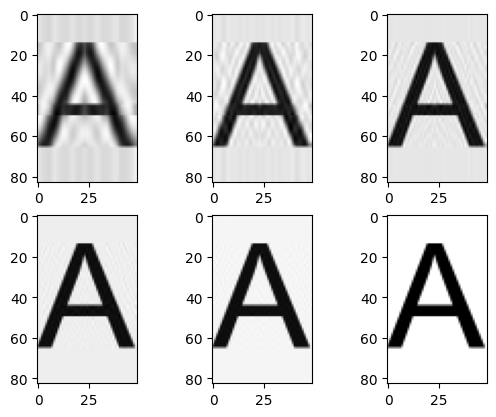

In [12]:
def Compress (U, D, VT, k):
    u = U [:, :k]
    sigma = np.diag (D [:k])
    vt = VT [:k, :]
    a = u @ sigma @ vt
    delta = np.abs (A - a)
    print (k, round (np.max (delta), 5))
    return a
    
for i in range (1, 6):
    k = round (rkA / 10.0 * i)
    pl.subplot (2, 3, i)
    a = Compress (U, D, VT, k)
    pl.imshow (a, cmap = 'gray')

pl.subplot (2, 3, 6)
pl.imshow (Compress (U, D, VT, rkA), cmap = 'gray')